# Is Starting member(5) really matter in NBA?  
If not, Bench players can overcome this?  

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',50)

# **Preprocessing**
dataset : https://www.kaggle.com/marquis08/create-nba-2018-19-dataset

In [2]:
df = pd.read_csv("data/game2018.csv")
df.head(2)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21800001,1610612738,BOS,Boston,1628400,Semi Ojeleye,NaN,NaN,1:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,21800001,1610612738,BOS,Boston,1628464,Daniel Theis,NaN,NaN,4:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0


In [3]:
df[df['GAME_ID']==21800001].head(2)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21800001,1610612738,BOS,Boston,1628400,Semi Ojeleye,NaN,NaN,1:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,21800001,1610612738,BOS,Boston,1628464,Daniel Theis,NaN,NaN,4:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0


**Home 41 games, Away 41 games = 82 games**

In [4]:
# Sanity check - done
df.groupby(['TEAM_ID'])['GAME_ID'].nunique()

TEAM_ID
1610612737    82
1610612738    82
1610612739    82
1610612740    82
1610612741    82
1610612742    82
1610612743    82
1610612744    82
1610612745    82
1610612746    82
1610612747    82
1610612748    82
1610612749    82
1610612750    82
1610612751    82
1610612752    82
1610612753    82
1610612754    82
1610612755    82
1610612756    82
1610612757    82
1610612758    82
1610612759    82
1610612760    82
1610612761    82
1610612762    82
1610612763    82
1610612764    82
1610612765    82
1610612766    82
Name: GAME_ID, dtype: int64

## **"START_POSITION"**
If non NaN in this column, the players are called 'Starting 5' or 'Starting lineup'.  
Of course, there is possibilty that the head coch decide starting lineup strategically picking the players who normally start playing from the bench.

In [5]:
df['Starting_5'] = np.where(df['START_POSITION'].isna(),0,1)
pd.pivot_table(df, index = ['TEAM_ABBREVIATION','PLAYER_NAME'], aggfunc = 'sum')

AST   BLK  COMMENT   DREB   FG3A  FG3M  \
TEAM_ABBREVIATION PLAYER_NAME                                                  
ATL               Alex Len           86.0  69.0      0.0  266.0  204.0  74.0   
                  Alex Poythress     17.0  10.0      0.0   47.0   23.0   9.0   
                  BJ Johnson          0.0   0.0      0.0    6.0    6.0   3.0   
                  Daniel Hamilton    22.0   1.0      0.0   37.0   23.0   8.0   
                  DeAndre' Bembry   202.0  41.0      0.0  304.0  173.0  50.0   
...                                   ...   ...      ...    ...    ...   ...   
WAS               Thomas Bryant      92.0  67.0      0.0  341.0   99.0  33.0   
                  Tomas Satoransky  399.0  13.0      0.0  197.0  162.0  64.0   
                  Trevor Ariza      165.0  13.0      0.0  192.0  295.0  95.0   
                  Troy Brown Jr.     80.0   5.0      0.0  110.0   69.0  22.0   
                  Wesley Johnson      7.0   5.0      0.0   16.0   26.0   6.0   

                                    FG3_PCT    FGA    FGM  FG_PCT    FTA  \
TEAM_ABBREVIATION PLAYER_NAME                                              
ATL               Alex Len           21.653  648.0  320.0  35.852  216.0   
                  Alex Poythress      5.500   81.0   40.0   7.589   29.0   
                  BJ Johnson          1.000   16.0    8.0   2.429    2.0   
                  Daniel Hamilton     4.333   60.0   23.0   5.702    6.0   
                  DeAndre' Bembry    18.816  616.0  275.0  35.550  136.0   
...                                     ...    ...    ...     ...    ...   
WAS               Thomas Bryant      15.532  502.0  309.0  42.483  137.0   
                  Tomas Satoransky   24.770  530.0  257.0  37.209  160.0   
                  Trevor Ariza       12.979  509.0  208.0  17.052  121.0   
                  Troy Brown Jr.      8.713  234.0   97.0  19.469   47.0   
                  Wesley Johnson      1.666   40.0   10.0   2.099   10.0   

                                      FTM  FT_PCT     GAME_ID   OREB     PF  \
TEAM_ABBREVIATION PLAYER_NAME                                                 
ATL               Alex Len          140.0  34.789  1678647752  158.0  200.0   
                  Alex Poythress     18.0   5.500   457807110   29.0   47.0   
                  BJ Johnson          2.0   1.000   130805930    2.0    3.0   
                  Daniel Hamilton     3.0   1.500   414210470   10.0   19.0   
                  DeAndre' Bembry    87.0  29.532  1787650469   54.0  190.0   
...                                   ...     ...         ...    ...    ...   
WAS               Thomas Bryant     107.0  35.435  1569649191  113.0  126.0   
                  Tomas Satoransky  131.0  41.408  1744048629   82.0  172.0   
                  Trevor Ariza       94.0  24.247   937433180   34.0   86.0   
                  Troy Brown Jr.     32.0  15.400  1133637306   35.0   56.0   
                  Wesley Johnson      7.0   3.500   261611192    2.0   18.0   

                                    PLAYER_ID  PLUS_MINUS    PTS    REB  \
TEAM_ABBREVIATION PLAYER_NAME                                             
ATL               Alex Len           15666266      -163.0  854.0  424.0   
                  Alex Poythress     34184136       -75.0  107.0   76.0   
                  BJ Johnson          9775008       -14.0   21.0    8.0   
                  Daniel Hamilton    30927668       -26.0   57.0   47.0   
                  DeAndre' Bembry   133476402      -229.0  687.0  358.0   
...                                       ...         ...    ...    ...   
WAS               Thomas Bryant     117246096      -107.0  758.0  454.0   
                  Tomas Satoransky   16248560       -54.0  709.0  279.0   
                  Trevor Ariza         119196       -54.0  605.0  226.0   
                  Troy Brown Jr.     84706544        -1.0  248.0  145.0   
                  Wesley Johnson      2427900        -5.0   33.0   18.0   

    

FGM: Field Goals Made, FGA: Field Goal Attempts

In [6]:
base_cols = df.columns.tolist()[2:]
drop_cols = ['COMMENT','GAME_ID','PLAYER_ID','TEAM_ID','TEAM_CITY','TEAM_ABBREVIATION', 'START_POSITION',  'PLAYER_NAME', ]

base_cols = list(set(base_cols).difference(set(drop_cols)))
print(base_cols)
# cols_to_agg is the same as base_cols but more categorically sorted.
cols_to_agg = ('Starting_5',  'PTS', 'PLUS_MINUS', 'FGA','FGM', 'FG_PCT', 'FTA', 'FTM', 'FT_PCT', 'FG3A', 'FG3M', 'FG3_PCT', 
             'BLK', 'TO', 'STL', 'PF', 'AST', 'MIN', 'REB', 'DREB', 'OREB')
# if cols_to_agg is list, can't make it to dict since list is unhashable. Thus use tuple or set

['FG_PCT', 'DREB', 'FT_PCT', 'OREB', 'FG3_PCT', 'PTS', 'BLK', 'PF', 'AST', 'REB', 'TO', 'FGA', 'FG3M', 'FG3A', 'STL', 'FTA', 'MIN', 'Starting_5', 'FTM', 'FGM', 'PLUS_MINUS']


In [7]:
agg_dict = defaultdict(list)
for c in cols_to_agg:
    agg_dict[c] = ['mean','sum']
agg_dict['PLAYER_ID'] = ['count'] # Number of Appearance
agg_dict

defaultdict(list,
            {'Starting_5': ['mean', 'sum'],
             'PTS': ['mean', 'sum'],
             'PLUS_MINUS': ['mean', 'sum'],
             'FGA': ['mean', 'sum'],
             'FGM': ['mean', 'sum'],
             'FG_PCT': ['mean', 'sum'],
             'FTA': ['mean', 'sum'],
             'FTM': ['mean', 'sum'],
             'FT_PCT': ['mean', 'sum'],
             'FG3A': ['mean', 'sum'],
             'FG3M': ['mean', 'sum'],
             'FG3_PCT': ['mean', 'sum'],
             'BLK': ['mean', 'sum'],
             'TO': ['mean', 'sum'],
             'STL': ['mean', 'sum'],
             'PF': ['mean', 'sum'],
             'AST': ['mean', 'sum'],
             'MIN': ['mean', 'sum'],
             'REB': ['mean', 'sum'],
             'DREB': ['mean', 'sum'],
             'OREB': ['mean', 'sum'],
             'PLAYER_ID': ['count']})

### **"MIN" to numeric type**
Make "MIN" to Seconds since groupby.agg says:  
DataError: No numeric types to aggregate

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26101 entries, 0 to 26100
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            26101 non-null  int64  
 1   TEAM_ID            26101 non-null  int64  
 2   TEAM_ABBREVIATION  26101 non-null  object 
 3   TEAM_CITY          26101 non-null  object 
 4   PLAYER_ID          26101 non-null  int64  
 5   PLAYER_NAME        26101 non-null  object 
 6   START_POSITION     12300 non-null  object 
 7   COMMENT            0 non-null      float64
 8   MIN                26101 non-null  object 
 9   FGM                26101 non-null  float64
 10  FGA                26101 non-null  float64
 11  FG_PCT             26101 non-null  float64
 12  FG3M               26101 non-null  float64
 13  FG3A               26101 non-null  float64
 14  FG3_PCT            26101 non-null  float64
 15  FTM                26101 non-null  float64
 16  FTA                261

In [9]:
df['MIN'].head()

0     1:27
1     4:08
2    19:14
3    25:00
4    26:31
Name: MIN, dtype: object

In [10]:
def get_min(x):
    return int(x.split(":")[0])*60 + int(x.split(":")[-1])

In [11]:
df["MIN"] = df["MIN"].apply(lambda x: get_min(x))

In [12]:
df['MIN'].head()

0      87
1     248
2    1154
3    1500
4    1591
Name: MIN, dtype: int64

In [13]:
tmp = df.groupby(['TEAM_ABBREVIATION','PLAYER_NAME']).agg(agg_dict)
tmp.columns = tmp.columns.map('_'.join)
tmp.reset_index(inplace=True)
tmp

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,FG3_PCT_sum,BLK_mean,BLK_sum,TO_mean,TO_sum,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,PLAYER_ID_count
0,ATL,Alex Len,0.402597,31,11.090909,854.0,-2.116883,-163.0,8.415584,648.0,4.155844,320.0,0.465610,35.852,2.805195,216.0,1.818182,140.0,0.451805,34.789,2.649351,204.0,0.961039,74.0,0.281208,21.653,0.896104,69.0,1.259740,97.0,0.350649,27.0,2.597403,200.0,1.116883,86.0,1203.220779,92648,5.506494,424.0,3.454545,266.0,2.051948,158.0,77
1,ATL,Alex Poythress,0.047619,1,5.095238,107.0,-3.571429,-75.0,3.857143,81.0,1.904762,40.0,0.361381,7.589,1.380952,29.0,0.857143,18.0,0.261905,5.500,1.095238,23.0,0.428571,9.0,0.261905,5.500,0.476190,10.0,0.619048,13.0,0.190476,4.0,2.238095,47.0,0.809524,17.0,871.142857,18294,3.619048,76.0,2.238095,47.0,1.380952,29.0,21
2,ATL,BJ Johnson,0.000000,0,3.500000,21.0,-2.333333,-14.0,2.666667,16.0,1.333333,8.0,0.404833,2.429,0.333333,2.0,0.333333,2.0,0.166667,1.000,1.000000,6.0,0.500000,3.0,0.166667,1.000,0.000000,0.0,0.333333,2.0,0.333333,2.0,0.500000,3.0,0.000000,0.0,433.000000,2598,1.333333,8.0,1.000000,6.0,0.333333,2.0,6
3,ATL,Daniel Hamilton,0.157895,3,3.000000,57.0,-1.368421,-26.0,3.157895,60.0,1.210526,23.0,0.300105,5.702,0.315789,6.0,0.157895,3.0,0.078947,1.500,1.210526,23.0,0.421053,8.0,0.228053,4.333,0.052632,1.0,0.842105,16.0,0.315789,6.0,1.000000,19.0,1.157895,22.0,644.736842,12250,2.473684,47.0,1.947368,37.0,0.526316,10.0,19
4,ATL,DeAndre' Bembry,0.182927,15,8.378049,687.0,-2.792683,-229.0,7.512195,616.0,3.353659,275.0,0.433537,35.550,1.658537,136.0,1.060976,87.0,0.360146,29.532,2.109756,173.0,0.609756,50.0,0.229463,18.816,0.500000,41.0,1.731707,142.0,1.280488,105.0,2.317073,190.0,2.463415,202.0,1413.195122,115882,4.365854,358.0,3.707317,304.0,0.658537,54.0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,WAS,Thomas Bryant,0.736111,53,10.527778,758.0,-1.486111,-107.0,6.972222,502.0,4.291667,309.0,0.590042,42.483,1.902778,137.0,1.486111,107.0,0.492153,35.435,1.375000,99.0,0.458333,33.0,0.215722,15.532,0.930556,67.0,0.833333,60.0,0.347222,25.0,1.750000,126.0,1.277778,92.0,1246.958333,89781,6.305556,454.0,4.736111,341.0,1.569444,113.0,72
618,WAS,Tomas Satoransky,0.675000,54,8.862500,709.0,-0.675000,-54.0,6.625000,530.0,3.212500,257.0,0.465113,37.209,2.000000,160.0,1.637500,131.0,0.517600,41.408,2.025000,162.0,0.800000,64.0,0.309625,24.770,0.162500,13.0,1.500000,120.0,1.025000,82.0,2.150000,172.0,4.987500,399.0,1622.687500,129815,3.487500,279.0,2.462500,197.0,1.025000,82.0,80
619,WAS,Trevor Ariza,1.000000,43,14.069767,605.0,-1.255814,-54.0,11.837209,509.0,4.837209,208.0,0.396558,17.052,2.813953,121.0,2.186047,94.0,0.563884,24.247,6.860465,295.0,2.209302,95.0,0.301837,12.979,0.302326,13.0,1.558140,67.0,1.232558,53.0,2.000000,86.0,3.837209,165.0,2044.209302,87901,5.255814,226.0,4.465116,192.0,0.790698,34.0,43
620,WAS,Troy Brown Jr.,0.192308,10,4.769231,248.0,-0.019231,-1.0,4.500000,234.0,1.865385,97.0,0.374404,19.469,0.903846,47.0,0.615385,32.0,0.296154,15.400,1.326923,69.0,0.423077,22.0,0.167558,8.713,0.096154,5.0,0.576923,30.0,0.403846,21.0,1.076923,56.0,1.538462,80.0,842.019231,43785,2.788462,145.0,2.115385,110.0,0.673077,35.0,52


Rename PLAYER_ID_count to GAMES

In [14]:
tmp.rename({"PLAYER_ID_count":"GAMES"},inplace=True, axis='columns')

In [15]:
tmp['Prob_Starting5'] = tmp['Starting_5_sum'] / 82 # total 82 games
tmp['Total_appearance_pcnt'] = tmp['GAMES'] / 82

In [16]:
tmp.describe()

,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,FG3_PCT_sum,BLK_mean,BLK_sum,TO_mean,TO_sum,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,0.354182,19.774920,8.443304,439.827974,-0.494304,0.000000,6.921507,352.826367,3.119686,162.479100,0.395117,18.044730,1.751100,91.250804,1.325569,69.926045,0.369128,18.291498,2.542660,126.594855,0.878363,44.943730,0.225336,10.571466,0.375811,19.590032,1.038933,53.524116,0.607129,30.191318,1.714287,82.676849,1.861146,97.239550,1152.721890,57342.951768,3.559140,178.628617,2.738413,137.705788,0.820726,40.922830,41.963023,0.241158,0.511744
std,0.396789,26.200346,6.006777,469.372035,3.340213,157.581081,4.520160,361.041603,2.180449,170.961679,0.129046,13.228275,1.601450,116.348862,1.283549,92.488103,0.221187,16.870400,2.086087,148.581451,0.799331,55.815936,0.137342,9.610249,0.397678,27.384495,0.775671,58.813266,0.426712,30.620008,0.830279,67.918228,1.708440,122.536933,552.817065,48763.999120,2.525803,188.881525,1.899374,141.651867,0.783033,54.199136,26.689246,0.319516,0.325479
min,0.000000,0.000000,0.000000,0.000000,-10.692308,-672.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.012195
25%,0.000000,0.000000,3.987288,80.000000,-2.164474,-60.750000,3.419048,66.000000,1.500000,28.250000,0.346581,5.677250,0.670455,14.000000,0.470588,10.000000,0.197869,4.000000,0.852564,12.000000,0.231113,3.000000,0.124550,1.841250,0.105733,2.250000,0.500000,10.000000,0.310884,6.000000,1.139163,22.000000,0.747359,14.250000,719.025000,12930.250000,1.764706,36.000000,1.409004,27.000000,0.300000,6.000000,17.000000,0.000000,0.207317
50%,0.157895,5.000000,6.980769,280.500000,-0.602840,-9.000000,5.974288,230.000000,2.647854,101.000000,0.408364,16.830000,1.262283,48.500000,0.981481,37.000000,0.364099,13.650500,2.177979,75.000000,0.747340,24.000000,0.258706,8.292000,0.264490,10.000000,0.858951,35.000000,0.533370,20.000000,1.744093,71.000000,1.291975,54.500000,1142.597581,45671.000000,3.000000,123.000000,2.320494,98.500000,0.600644,22.000000,43.000000,0.060976,0.524390
75%,0.774559,32.000000,11.614886,623.750000,1.071789,34.750000,9.489865,510.500000,4.236073,228.000000,0.462504,29.541250,2.336039,123.000000,1.793625,92.750000,0.523873,28.795750,3.768125,195.750000,1.336580,67.000000,0.326674,17.724250,0.498188,25.000000,1.422776,75.000000,0.851852,46.000000,2.303261,131.000000,2.445847,122.750000,1633.016234,94518.500000,4.683908,256.500000,3.599390,199.000000,1.067584,54.000000,68.000000,0.390244,0.829268
max,1.000000,82.000000,36.128205,2818.000000,28.000000,689.000000,24.474359,1909.000000,10.807692,843.000000,1.000000,54.741000,11.000000,858.000000,9.666667,754.000000,1.000000,67.892000,13.179487,1028.000000,5.130435,378.000000,1.000000,36.233000,2.689189,199.000000,4.961538,387.000000,2.400000,170.000000,4.000000,292.000000,10.739726,784.000000,2215.341463,181658.000000,15.594937,1232.000000,11.109375,809.000000,5.3544

## **Get All-time Starting_5 players.**

6 players!

In [17]:
print(tmp[tmp['Prob_Starting5']==1].shape)
tmp[tmp['Prob_Starting5']==1]

(6, 47)


,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,FG3_PCT_sum,BLK_mean,BLK_sum,TO_mean,TO_sum,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt
66,CHA,Kemba Walker,1.0,82,25.634146,2102.0,0.439024,36.0,20.536585,1684.0,8.914634,731.0,0.426256,34.953,5.487805,450.0,4.634146,380.0,0.738890,60.589,8.914634,731.0,3.170732,260.0,0.344366,28.238,0.414634,34.0,2.573171,211.0,1.243902,102.0,1.597561,131.0,5.902439,484.0,2094.621951,171759,4.402439,361.0,3.768293,309.0,0.634146,52.0,82,1.0,1.0
176,DET,Reggie Jackson,1.0,82,15.365854,1260.0,0.536585,44.0,12.768293,1047.0,5.378049,441.0,0.420780,34.504,2.878049,236.0,2.487805,204.0,0.674146,55.280,5.743902,471.0,2.121951,174.0,0.363854,29.836,0.109756,9.0,1.804878,148.0,0.670732,55.0,2.536585,208.0,4.195122,344.0,1674.792683,137333,2.634146,216.0,2.085366,171.0,0.548780,45.0,82,1.0,1.0
219,HOU,P.J. Tucker,1.0,82,7.329268,601.0,2.951220,242.0,6.378049,523.0,2.524390,207.0,0.390951,32.058,0.719512,59.0,0.500000,41.0,0.188012,15.417,4.719512,387.0,1.780488,146.0,0.367939,30.171,0.475610,39.0,0.768293,63.0,1.609756,132.0,3.073171,252.0,1.170732,96.0,2050.341463,168128,5.841463,479.0,4.365854,358.0,1.475610,121.0,82,1.0,1.0
525,SAC,Buddy Hield,1.0,82,20.670732,1695.0,0.000000,0.0,16.585366,1360.0,7.597561,623.0,0.458317,37.582,2.353659,193.0,2.085366,171.0,0.586207,48.069,7.939024,651.0,3.390244,278.0,0.425122,34.860,0.402439,33.0,1.780488,146.0,0.707317,58.0,2.463415,202.0,2.500000,205.0,1913.317073,156892,5.024390,412.0,3.731707,306.0,1.292683,106.0,82,1.0,1.0
587,UTA,Joe Ingles,1.0,82,12.121951,994.0,5.219512,428.0,9.780488,802.0,4.378049,359.0,0.441878,36.234,1.500000,123.0,1.060976,87.0,0.373427,30.621,5.890244,483.0,2.304878,189.0,0.375524,30.793,0.243902,20.0,2.353659,193.0,1.195122,98.0,2.195122,180.0,5.719512,469.0,1878.695122,154053,4.024390,330.0,3.597561,295.0,0.426829,35.0,82,1.0,1.0
599,WAS,Bradley Beal,1.0,82,25.597561,2099.0,-1.365854,-112.0,19.621951,1609.0,9.317073,764.0,0.473817,38.853,5.463415,448.0,4.414634,362.0,0.791707,64.920,7.268293,596.0,2.548780,209.0,0.338634,27.768,0.707317,58.0,2.731707,224.0,1.475610,121.0,2.756098,226.0,5.463415,448.0,2215.341463,181658,5.012195,411.0,3.926829,322.0,1.085366,89.0,82,1.0,1.0


# **Get All-time players no matter starting or bench.**

19 players!

In [18]:
print(tmp[tmp['Total_appearance_pcnt']==1].shape)
tmp[tmp['Total_appearance_pcnt']==1].head()

(19, 47)


,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,FG3_PCT_sum,BLK_mean,BLK_sum,TO_mean,TO_sum,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt
4,ATL,DeAndre' Bembry,0.182927,15,8.378049,687.0,-2.792683,-229.0,7.512195,616.0,3.353659,275.0,0.433537,35.550,1.658537,136.0,1.060976,87.0,0.360146,29.532,2.109756,173.0,0.609756,50.0,0.229463,18.816,0.500000,41.0,1.731707,142.0,1.280488,105.0,2.317073,190.0,2.463415,202.0,1413.195122,115882,4.365854,358.0,3.707317,304.0,0.658537,54.0,82,0.182927,1.0
66,CHA,Kemba Walker,1.000000,82,25.634146,2102.0,0.439024,36.0,20.536585,1684.0,8.914634,731.0,0.426256,34.953,5.487805,450.0,4.634146,380.0,0.738890,60.589,8.914634,731.0,3.170732,260.0,0.344366,28.238,0.414634,34.0,2.573171,211.0,1.243902,102.0,1.597561,131.0,5.902439,484.0,2094.621951,171759,4.402439,361.0,3.768293,309.0,0.634146,52.0,82,1.000000,1.0
104,CLE,Collin Sexton,0.878049,72,16.719512,1371.0,-8.195122,-672.0,14.707317,1206.0,6.329268,519.0,0.421780,34.586,3.109756,255.0,2.609756,214.0,0.665110,54.539,3.609756,296.0,1.451220,119.0,0.361561,29.648,0.073171,6.0,2.256098,185.0,0.536585,44.0,2.268293,186.0,2.963415,243.0,1906.121951,156302,2.878049,236.0,2.182927,179.0,0.695122,57.0,82,0.878049,1.0
153,DEN,Mason Plumlee,0.207317,17,7.768293,637.0,0.878049,72.0,5.390244,442.0,3.195122,262.0,0.572451,46.941,2.414634,198.0,1.353659,111.0,0.445463,36.528,0.121951,10.0,0.024390,2.0,0.024390,2.000,0.926829,76.0,1.536585,126.0,0.804878,66.0,3.073171,252.0,2.963415,243.0,1266.573171,103859,6.390244,524.0,4.378049,359.0,2.012195,165.0,82,0.207317,1.0
154,DEN,Monte Morris,0.073171,6,10.378049,851.0,2.182927,179.0,8.560976,702.0,4.219512,346.0,0.482110,39.533,0.987805,81.0,0.792683,65.0,0.295622,24.241,2.768293,227.0,1.146341,94.0,0.377866,30.985,0.048780,4.0,0.634146,52.0,0.890244,73.0,1.243902,102.0,3.621951,297.0,1441.621951,118213,2.365854,194.0,1.939024,159.0,0.426829,35.0,82,0.073171,1.0


### **Merge to get rank of 2018-19 season**
Conf_rank: Rank of Conference

In [19]:
tmp = tmp.merge(df[['TEAM_ABBREVIATION','TEAM_ID']].groupby(['TEAM_ABBREVIATION']).max().reset_index(), on=['TEAM_ABBREVIATION'], how='left')
tmp.head()

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,FG3_PCT_sum,BLK_mean,BLK_sum,TO_mean,TO_sum,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID
0,ATL,Alex Len,0.402597,31,11.090909,854.0,-2.116883,-163.0,8.415584,648.0,4.155844,320.0,0.465610,35.852,2.805195,216.0,1.818182,140.0,0.451805,34.789,2.649351,204.0,0.961039,74.0,0.281208,21.653,0.896104,69.0,1.259740,97.0,0.350649,27.0,2.597403,200.0,1.116883,86.0,1203.220779,92648,5.506494,424.0,3.454545,266.0,2.051948,158.0,77,0.378049,0.939024,1610612737
1,ATL,Alex Poythress,0.047619,1,5.095238,107.0,-3.571429,-75.0,3.857143,81.0,1.904762,40.0,0.361381,7.589,1.380952,29.0,0.857143,18.0,0.261905,5.500,1.095238,23.0,0.428571,9.0,0.261905,5.500,0.476190,10.0,0.619048,13.0,0.190476,4.0,2.238095,47.0,0.809524,17.0,871.142857,18294,3.619048,76.0,2.238095,47.0,1.380952,29.0,21,0.012195,0.256098,1610612737
2,ATL,BJ Johnson,0.000000,0,3.500000,21.0,-2.333333,-14.0,2.666667,16.0,1.333333,8.0,0.404833,2.429,0.333333,2.0,0.333333,2.0,0.166667,1.000,1.000000,6.0,0.500000,3.0,0.166667,1.000,0.000000,0.0,0.333333,2.0,0.333333,2.0,0.500000,3.0,0.000000,0.0,433.000000,2598,1.333333,8.0,1.000000,6.0,0.333333,2.0,6,0.000000,0.073171,1610612737
3,ATL,Daniel Hamilton,0.157895,3,3.000000,57.0,-1.368421,-26.0,3.157895,60.0,1.210526,23.0,0.300105,5.702,0.315789,6.0,0.157895,3.0,0.078947,1.500,1.210526,23.0,0.421053,8.0,0.228053,4.333,0.052632,1.0,0.842105,16.0,0.315789,6.0,1.000000,19.0,1.157895,22.0,644.736842,12250,2.473684,47.0,1.947368,37.0,0.526316,10.0,19,0.036585,0.231707,1610612737
4,ATL,DeAndre' Bembry,0.182927,15,8.378049,687.0,-2.792683,-229.0,7.512195,616.0,3.353659,275.0,0.433537,35.550,1.658537,136.0,1.060976,87.0,0.360146,29.532,2.109756,173.0,0.609756,50.0,0.229463,18.816,0.500000,41.0,1.731707,142.0,1.280488,105.0,2.317073,190.0,2.463415,202.0,1413.195122,115882,4.365854,358.0,3.707317,304.0,0.658537,54.0,82,0.182927,1.000000,1610612737


In [20]:
rank = pd.read_csv("data/rank2018.csv")
rank.head()

,CONFERENCE,TEAM_ID,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Conf_rank
0,East,1610612749,Milwaukee,82,60,22,0.732,33-8,27-14,1
1,East,1610612761,Toronto,82,58,24,0.707,32-9,26-15,2
2,East,1610612755,Philadelphia,82,51,31,0.622,31-10,20-21,3
3,East,1610612738,Boston,82,49,33,0.598,28-13,21-20,4
4,East,1610612754,Indiana,82,48,34,0.585,29-12,19-22,5


In [21]:
tmp = tmp.merge(rank.drop(['HOME_RECORD','ROAD_RECORD'],axis=1),on=['TEAM_ID'],how='left')
tmp.head()

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank
0,ATL,Alex Len,0.402597,31,11.090909,854.0,-2.116883,-163.0,8.415584,648.0,4.155844,320.0,0.465610,35.852,2.805195,216.0,1.818182,140.0,0.451805,34.789,2.649351,204.0,0.961039,74.0,0.281208,...,0.350649,27.0,2.597403,200.0,1.116883,86.0,1203.220779,92648,5.506494,424.0,3.454545,266.0,2.051948,158.0,77,0.378049,0.939024,1610612737,East,Atlanta,82,29,53,0.354,12
1,ATL,Alex Poythress,0.047619,1,5.095238,107.0,-3.571429,-75.0,3.857143,81.0,1.904762,40.0,0.361381,7.589,1.380952,29.0,0.857143,18.0,0.261905,5.500,1.095238,23.0,0.428571,9.0,0.261905,...,0.190476,4.0,2.238095,47.0,0.809524,17.0,871.142857,18294,3.619048,76.0,2.238095,47.0,1.380952,29.0,21,0.012195,0.256098,1610612737,East,Atlanta,82,29,53,0.354,12
2,ATL,BJ Johnson,0.000000,0,3.500000,21.0,-2.333333,-14.0,2.666667,16.0,1.333333,8.0,0.404833,2.429,0.333333,2.0,0.333333,2.0,0.166667,1.000,1.000000,6.0,0.500000,3.0,0.166667,...,0.333333,2.0,0.500000,3.0,0.000000,0.0,433.000000,2598,1.333333,8.0,1.000000,6.0,0.333333,2.0,6,0.000000,0.073171,1610612737,East,Atlanta,82,29,53,0.354,12
3,ATL,Daniel Hamilton,0.157895,3,3.000000,57.0,-1.368421,-26.0,3.157895,60.0,1.210526,23.0,0.300105,5.702,0.315789,6.0,0.157895,3.0,0.078947,1.500,1.210526,23.0,0.421053,8.0,0.228053,...,0.315789,6.0,1.000000,19.0,1.157895,22.0,644.736842,12250,2.473684,47.0,1.947368,37.0,0.526316,10.0,19,0.036585,0.231707,1610612737,East,Atlanta,82,29,53,0.354,12
4,ATL,DeAndre' Bembry,0.182927,15,8.378049,687.0,-2.792683,-229.0,7.512195,616.0,3.353659,275.0,0.433537,35.550,1.658537,136.0,1.060976,87.0,0.360146,29.532,2.109756,173.0,0.609756,50.0,0.229463,...,1.280488,105.0,2.317073,190.0,2.463415,202.0,1413.195122,115882,4.365854,358.0,3.707317,304.0,0.658537,54.0,82,0.182927,1.000000,1610612737,East,Atlanta,82,29,53,0.354,12


#### **Preprocessing is done.**

---

## **Questions**
### - Does **strong bench** related to the rank (by conference) ?
### - Then, how to **define** bench players and starting players?
### - What is the **optimal threshold** for classify players?

### **1. How to separate starting or bench players with Prob_Starting5 ?**
#### Let's Plot this.

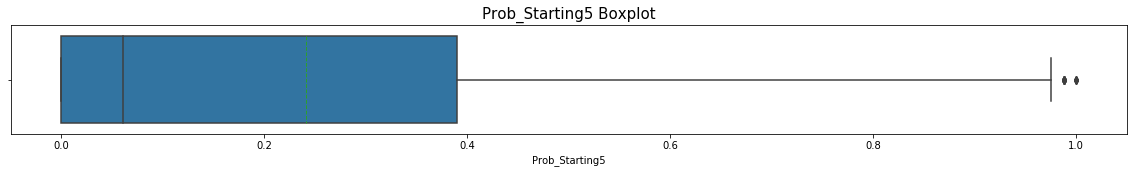

In [22]:
plt.figure(figsize=[20,2])
sns.boxplot(x=tmp['Prob_Starting5'], showmeans = True, meanline = True)
plt.title('Prob_Starting5 Boxplot',fontsize=15);

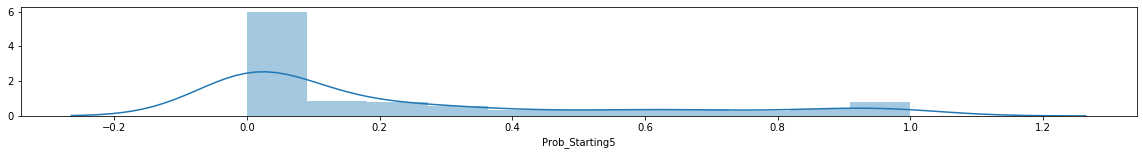

In [23]:
plt.figure(figsize=[20,2])
sns.distplot(tmp['Prob_Starting5']);

From the boxplot, we can notice that 0.4 is near the Q3 point.  
Based on this result, let's check whether each teams' players have exactly the 5 players whose 'Prob_Starting5' is over 0.4.  

In [24]:
tmp[tmp['Prob_Starting5']>0.4].head(10)

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank
5,ATL,Dewayne Dedmon,0.812500,52,10.828125,693.0,-2.703125,-173.0,8.218750,526.0,4.046875,259.0,0.499953,31.997,1.765625,113.0,1.437500,92.0,0.543719,34.798,3.390625,217.0,1.296875,83.0,0.346531,...,1.078125,69.0,3.343750,214.0,1.406250,90.0,1508.640625,96553,7.500000,480.0,5.859375,375.0,1.640625,105.0,64,0.634146,0.780488,1610612737,East,Atlanta,82,29,53,0.354,12
10,ATL,John Collins,0.967213,59,19.475410,1188.0,-1.245902,-76.0,13.622951,831.0,7.622951,465.0,0.557492,34.007,4.360656,266.0,3.327869,203.0,0.702443,42.849,2.590164,158.0,0.901639,55.0,0.295902,...,0.360656,22.0,3.262295,199.0,1.983607,121.0,1798.409836,109703,9.754098,595.0,6.163934,376.0,3.590164,219.0,61,0.719512,0.743902,1610612737,East,Atlanta,82,29,53,0.354,12
13,ATL,Kent Bazemore,0.522388,35,11.626866,779.0,-4.432836,-297.0,10.313433,691.0,4.149254,278.0,0.383373,25.686,2.611940,175.0,1.895522,127.0,0.535463,35.876,4.477612,300.0,1.432836,96.0,0.262672,...,1.328358,89.0,2.537313,170.0,2.268657,152.0,1471.701493,98604,3.895522,261.0,3.343284,224.0,0.552239,37.0,67,0.426829,0.817073,1610612737,East,Atlanta,82,29,53,0.354,12
14,ATL,Kevin Huerter,0.786667,59,9.693333,727.0,-1.586667,-119.0,8.760000,657.0,3.666667,275.0,0.408840,30.663,0.746667,56.0,0.546667,41.0,0.266667,20.000,4.706667,353.0,1.813333,136.0,0.346160,...,0.866667,65.0,2.066667,155.0,2.853333,214.0,1638.826667,122912,3.266667,245.0,2.466667,185.0,0.800000,60.0,75,0.719512,0.914634,1610612737,East,Atlanta,82,29,53,0.354,12
17,ATL,Taurean Prince,0.854545,47,13.490909,742.0,-4.418182,-243.0,10.800000,594.0,4.763636,262.0,0.452291,24.876,2.109091,116.0,1.727273,95.0,0.577273,31.750,5.727273,315.0,2.236364,123.0,0.405145,...,0.963636,53.0,2.563636,141.0,2.145455,118.0,1693.436364,93139,3.618182,199.0,3.218182,177.0,0.400000,22.0,55,0.573171,0.670732,1610612737,East,Atlanta,82,29,53,0.354,12
18,ATL,Trae Young,1.000000,81,19.123457,1549.0,-4.135802,-335.0,15.506173,1256.0,6.481481,525.0,0.410654,33.263,5.111111,414.0,4.234568,343.0,0.758086,61.405,5.950617,482.0,1.925926,156.0,0.312420,...,0.888889,72.0,1.728395,140.0,8.061728,653.0,1854.283951,150197,3.716049,301.0,2.925926,237.0,0.790123,64.0,81,0.987805,0.987805,1610612737,East,Atlanta,82,29,53,0.354,12
25,BKN,D'Angelo Russell,1.000000,81,21.135802,1712.0,0.271605,22.0,18.728395,1517.0,8.135802,659.0,0.427000,34.587,2.530864,205.0,1.975309,160.0,0.518531,42.001,7.839506,635.0,2.888889,234.0,0.350741,...,1.234568,100.0,1.740741,141.0,6.950617,563.0,1813.308642,146878,3.888889,315.0,3.234568,262.0,0.654321,53.0,81,0.987805,0.987805,1610612751,East,Brooklyn,82,42,40,0.512,6
30,BKN,Jarrett Allen,1.000000,80,10.912500,873.0,-1.487500,-119.0,7.100000,568.0,4.187500,335.0,0.609525,48.762,3.475000,278.0,2.462500,197.0,0.566175,45.294,0.562500,45.0,0.075000,6.0,0.045837,...,0.537500,43.0,2.300000,184.0,1.375000,110.0,1571.975000,125758,8.400000,672.0,6.012500,481.0,2.387500,191.0,80,0.975610,0.975610,1610612751,East,Brooklyn,82,42,40,0.512,6
31,BKN,Joe Harris,1.000000,76,13.697368,1041.0,-1.026316,-78.0,9.842105,748.0,4.921053,374.0,0.502447,38.186,1.750000,133.0,1.447368,110.0,0.519526,39.484,5.078947,386.0,2.407895,183.0,0.476750,...,0.500000,38.0,2.394737,182.0,2.381579,181.0,1810.710526,137614,3.828947,291.0,3.144737,239.0,0.684211,52.0,76,0.926829,0.926829,1610612751,East,Brooklyn,82,42,40,0.512,6
34,BKN,Rodions Kurucs,0.730159,46,8.476190,534.0,-0.031746,-2.0,7.126984,449.0,3.206349,202.0,0.463222,29.183,1.460317,92.0,1.142857,72.0,0.375921,23.683,2.920635,184.0,0.920635,58

Almost there.

In [25]:
tmp[tmp['Prob_Starting5']>0.4].groupby(['TEAM_ABBREVIATION'])['TEAM_ID'].count().reset_index()

,TEAM_ABBREVIATION,TEAM_ID
0,ATL,6
1,BKN,4
2,BOS,5
3,CHA,5
4,CHI,6
5,CLE,4
6,DAL,5
7,DEN,6
8,DET,5
9,GSW,4


In [26]:
find_best5 = tmp[tmp['Prob_Starting5']>0.4].groupby(['TEAM_ABBREVIATION'])['TEAM_ID'].count().reset_index()
find_best5['TEAM_ID'].value_counts()

5    18
6     7
4     5
Name: TEAM_ID, dtype: int64

In [27]:
tmp[tmp['Prob_Starting5']>0.55].groupby(['TEAM_ABBREVIATION'])['TEAM_ID'].count().reset_index()['TEAM_ID'].value_counts()

5    12
4    10
3     6
2     2
Name: TEAM_ID, dtype: int64

## **No.**  
I have to classify starting_5 and bench_members based on each teams by sorting 'Prob_Starting5'.  

In [28]:
# best5 = tmp.groupby(["TEAM_ABBREVIATION"])["Prob_Starting5"].nlargest(5).reset_index()
# best5

This is Starting_5 players

In [29]:
tmp.groupby(["TEAM_ABBREVIATION"]).apply(lambda x: x.sort_values(["Prob_Starting5"], ascending = False)[:5]).reset_index(drop=True).head(10)

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank
0,ATL,Trae Young,1.000000,81,19.123457,1549.0,-4.135802,-335.0,15.506173,1256.0,6.481481,525.0,0.410654,33.263,5.111111,414.0,4.234568,343.0,0.758086,61.405,5.950617,482.0,1.925926,156.0,0.312420,...,0.888889,72.0,1.728395,140.0,8.061728,653.0,1854.283951,150197,3.716049,301.0,2.925926,237.0,0.790123,64.0,81,0.987805,0.987805,1610612737,East,Atlanta,82,29,53,0.354,12
1,ATL,John Collins,0.967213,59,19.475410,1188.0,-1.245902,-76.0,13.622951,831.0,7.622951,465.0,0.557492,34.007,4.360656,266.0,3.327869,203.0,0.702443,42.849,2.590164,158.0,0.901639,55.0,0.295902,...,0.360656,22.0,3.262295,199.0,1.983607,121.0,1798.409836,109703,9.754098,595.0,6.163934,376.0,3.590164,219.0,61,0.719512,0.743902,1610612737,East,Atlanta,82,29,53,0.354,12
2,ATL,Kevin Huerter,0.786667,59,9.693333,727.0,-1.586667,-119.0,8.760000,657.0,3.666667,275.0,0.408840,30.663,0.746667,56.0,0.546667,41.0,0.266667,20.000,4.706667,353.0,1.813333,136.0,0.346160,...,0.866667,65.0,2.066667,155.0,2.853333,214.0,1638.826667,122912,3.266667,245.0,2.466667,185.0,0.800000,60.0,75,0.719512,0.914634,1610612737,East,Atlanta,82,29,53,0.354,12
3,ATL,Dewayne Dedmon,0.812500,52,10.828125,693.0,-2.703125,-173.0,8.218750,526.0,4.046875,259.0,0.499953,31.997,1.765625,113.0,1.437500,92.0,0.543719,34.798,3.390625,217.0,1.296875,83.0,0.346531,...,1.078125,69.0,3.343750,214.0,1.406250,90.0,1508.640625,96553,7.500000,480.0,5.859375,375.0,1.640625,105.0,64,0.634146,0.780488,1610612737,East,Atlanta,82,29,53,0.354,12
4,ATL,Taurean Prince,0.854545,47,13.490909,742.0,-4.418182,-243.0,10.800000,594.0,4.763636,262.0,0.452291,24.876,2.109091,116.0,1.727273,95.0,0.577273,31.750,5.727273,315.0,2.236364,123.0,0.405145,...,0.963636,53.0,2.563636,141.0,2.145455,118.0,1693.436364,93139,3.618182,199.0,3.218182,177.0,0.400000,22.0,55,0.573171,0.670732,1610612737,East,Atlanta,82,29,53,0.354,12
5,BKN,D'Angelo Russell,1.000000,81,21.135802,1712.0,0.271605,22.0,18.728395,1517.0,8.135802,659.0,0.427000,34.587,2.530864,205.0,1.975309,160.0,0.518531,42.001,7.839506,635.0,2.888889,234.0,0.350741,...,1.234568,100.0,1.740741,141.0,6.950617,563.0,1813.308642,146878,3.888889,315.0,3.234568,262.0,0.654321,53.0,81,0.987805,0.987805,1610612751,East,Brooklyn,82,42,40,0.512,6
6,BKN,Jarrett Allen,1.000000,80,10.912500,873.0,-1.487500,-119.0,7.100000,568.0,4.187500,335.0,0.609525,48.762,3.475000,278.0,2.462500,197.0,0.566175,45.294,0.562500,45.0,0.075000,6.0,0.045837,...,0.537500,43.0,2.300000,184.0,1.375000,110.0,1571.975000,125758,8.400000,672.0,6.012500,481.0,2.387500,191.0,80,0.975610,0.975610,1610612751,East,Brooklyn,82,42,40,0.512,6
7,BKN,Joe Harris,1.000000,76,13.697368,1041.0,-1.026316,-78.0,9.842105,748.0,4.921053,374.0,0.502447,38.186,1.750000,133.0,1.447368,110.0,0.519526,39.484,5.078947,386.0,2.407895,183.0,0.476750,...,0.500000,38.0,2.394737,182.0,2.381579,181.0,1810.710526,137614,3.828947,291.0,3.144737,239.0,0.684211,52.0,76,0.926829,0.926829,1610612751,East,Brooklyn,82,42,40,0.512,6
8,BKN,Rodions Kurucs,0.730159,46,8.476190,534.0,-0.031746,-2.0,7.126984,449.0,3.206349,202.0,0.463222,29.183,1.460317,92.0,1.142857,72.0,0.375921,23.683,2.920635,184.0,0.920635,58.0,0.294476,...,0.650794,41.0,2.317460,146.0,0.825397,52.0,1232.174603,77627,3.904762,246.0,3.015873,190.0,0.888889,56.0,63,0.560976,0.768293,1610612751,East,Brooklyn,82,42,40,0.512,6
9,BKN,Jared Dudley,0.423729,25,4.864407,287.0,0.593220,35.0,4.050847,239.0,1.711864,101.0,0.400220,23.613,0.779661,46.0,0.542373,32.0,0.177966,10.500,2.559322,151.0,0.898305,53.0,0.302746,...,0.

In [30]:
display(tmp.groupby(["TEAM_ABBREVIATION"]).apply(lambda x: x.sort_values(["Prob_Starting5"], ascending = False)[:5]).reset_index(drop=True).head())
display(tmp.groupby(["TEAM_ABBREVIATION"]).apply(lambda x: x.sort_values(["Prob_Starting5"], ascending = False)[:5]).reset_index(drop=True).tail())

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank
0,ATL,Trae Young,1.000000,81,19.123457,1549.0,-4.135802,-335.0,15.506173,1256.0,6.481481,525.0,0.410654,33.263,5.111111,414.0,4.234568,343.0,0.758086,61.405,5.950617,482.0,1.925926,156.0,0.312420,...,0.888889,72.0,1.728395,140.0,8.061728,653.0,1854.283951,150197,3.716049,301.0,2.925926,237.0,0.790123,64.0,81,0.987805,0.987805,1610612737,East,Atlanta,82,29,53,0.354,12
1,ATL,John Collins,0.967213,59,19.475410,1188.0,-1.245902,-76.0,13.622951,831.0,7.622951,465.0,0.557492,34.007,4.360656,266.0,3.327869,203.0,0.702443,42.849,2.590164,158.0,0.901639,55.0,0.295902,...,0.360656,22.0,3.262295,199.0,1.983607,121.0,1798.409836,109703,9.754098,595.0,6.163934,376.0,3.590164,219.0,61,0.719512,0.743902,1610612737,East,Atlanta,82,29,53,0.354,12
2,ATL,Kevin Huerter,0.786667,59,9.693333,727.0,-1.586667,-119.0,8.760000,657.0,3.666667,275.0,0.408840,30.663,0.746667,56.0,0.546667,41.0,0.266667,20.000,4.706667,353.0,1.813333,136.0,0.346160,...,0.866667,65.0,2.066667,155.0,2.853333,214.0,1638.826667,122912,3.266667,245.0,2.466667,185.0,0.800000,60.0,75,0.719512,0.914634,1610612737,East,Atlanta,82,29,53,0.354,12
3,ATL,Dewayne Dedmon,0.812500,52,10.828125,693.0,-2.703125,-173.0,8.218750,526.0,4.046875,259.0,0.499953,31.997,1.765625,113.0,1.437500,92.0,0.543719,34.798,3.390625,217.0,1.296875,83.0,0.346531,...,1.078125,69.0,3.343750,214.0,1.406250,90.0,1508.640625,96553,7.500000,480.0,5.859375,375.0,1.640625,105.0,64,0.634146,0.780488,1610612737,East,Atlanta,82,29,53,0.354,12
4,ATL,Taurean Prince,0.854545,47,13.490909,742.0,-4.418182,-243.0,10.800000,594.0,4.763636,262.0,0.452291,24.876,2.109091,116.0,1.727273,95.0,0.577273,31.750,5.727273,315.0,2.236364,123.0,0.405145,...,0.963636,53.0,2.563636,141.0,2.145455,118.0,1693.436364,93139,3.618182,199.0,3.218182,177.0,0.400000,22.0,55,0.573171,0.670732,1610612737,East,Atlanta,82,29,53,0.354,12


,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_mean,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank
145,WAS,Bradley Beal,1.000000,82,25.597561,2099.0,-1.365854,-112.0,19.621951,1609.0,9.317073,764.0,0.473817,38.853,5.463415,448.0,4.414634,362.0,0.791707,64.920,7.268293,596.0,2.548780,209.0,0.338634,...,1.475610,121.0,2.756098,226.0,5.463415,448.0,2215.341463,181658,5.012195,411.0,3.926829,322.0,1.085366,89.0,82,1.000000,1.000000,1610612764,East,Washington,82,32,50,0.39,11
146,WAS,Tomas Satoransky,0.675000,54,8.862500,709.0,-0.675000,-54.0,6.625000,530.0,3.212500,257.0,0.465113,37.209,2.000000,160.0,1.637500,131.0,0.517600,41.408,2.025000,162.0,0.800000,64.0,0.309625,...,1.025000,82.0,2.150000,172.0,4.987500,399.0,1622.687500,129815,3.487500,279.0,2.462500,197.0,1.025000,82.0,80,0.658537,0.975610,1610612764,East,Washington,82,32,50,0.39,11
147,WAS,Thomas Bryant,0.736111,53,10.527778,758.0,-1.486111,-107.0,6.972222,502.0,4.291667,309.0,0.590042,42.483,1.902778,137.0,1.486111,107.0,0.492153,35.435,1.375000,99.0,0.458333,33.0,0.215722,...,0.347222,25.0,1.750000,126.0,1.277778,92.0,1246.958333,89781,6.305556,454.0,4.736111,341.0,1.569444,113.0,72,0.646341,0.878049,1610612764,East,Washington,82,32,50,0.39,11
148,WAS,Jeff Green,0.571429,44,12.285714,946.0,-1.220779,-94.0,8.922078,687.0,4.233766,326.0,0.459623,35.391,2.675325,206.0,2.376623,183.0,0.730922,56.281,4.155844,320.0,1.441558,111.0,0.291649,...,0.558442,43.0,2.077922,160.0,1.779221,137.0,1633.779221,125801,4.012987,309.0,3.272727,252.0,0.740260,57.0,77,0.536585,0.939024,1610612764,East,Washington,82,32,50,0.39,11
149,WAS,Trevor Ariza,1.000000,43,14.069767,605.0,-1.255814,-54.0,11.837209,509.0,4.837209,208.0,0.396558,17.052,2.813953,121.0,2.186047,94.0,0.563884,24.247,6.860465,295.0,2.209302,95.0,0.301837,...,1.232558,53.0,2.000000,86.0,3.837209,165.0,2044.209302,87901,5.255814,226.0,4.465116,192.0,0.790698,34.0,43,0.524390,0.524390,1610612764,East,Washington,82,32,50,0.39,11


#### There were duplicates in PLAYER_NAME column.
So I have to assign START5 using idx.

In [31]:
# get only idx using head
start5_players = tmp.groupby(["TEAM_ABBREVIATION"]).apply(lambda x: x.sort_values(["Prob_Starting5"], ascending = False).head(5)).index.tolist()
start5_players[:5],start5_players[-5:]

([('ATL', 18), ('ATL', 10), ('ATL', 14), ('ATL', 5), ('ATL', 17)],
 [('WAS', 599), ('WAS', 618), ('WAS', 617), ('WAS', 607), ('WAS', 619)])

In [32]:
start5_players = [x[1] for x in start5_players]
start5_players[:5],start5_players[-5:]

([18, 10, 14, 5, 17], [599, 618, 617, 607, 619])

In [33]:
len(start5_players)

150

In [34]:
tmp['START5'] = np.where(tmp.index.isin(start5_players),1,0)

In [35]:
tmp[tmp['START5']==1].shape # should be 150 rows

(150, 56)

In [36]:
# Sanity Check
tmp[tmp['START5']==1].groupby(['TEAM_ABBREVIATION'])['START5'].count()

TEAM_ABBREVIATION
ATL    5
BKN    5
BOS    5
CHA    5
CHI    5
CLE    5
DAL    5
DEN    5
DET    5
GSW    5
HOU    5
IND    5
LAC    5
LAL    5
MEM    5
MIA    5
MIL    5
MIN    5
NOP    5
NYK    5
OKC    5
ORL    5
PHI    5
PHX    5
POR    5
SAC    5
SAS    5
TOR    5
UTA    5
WAS    5
Name: START5, dtype: int64

In [37]:
tmp.head()

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank,START5
0,ATL,Alex Len,0.402597,31,11.090909,854.0,-2.116883,-163.0,8.415584,648.0,4.155844,320.0,0.465610,35.852,2.805195,216.0,1.818182,140.0,0.451805,34.789,2.649351,204.0,0.961039,74.0,0.281208,...,27.0,2.597403,200.0,1.116883,86.0,1203.220779,92648,5.506494,424.0,3.454545,266.0,2.051948,158.0,77,0.378049,0.939024,1610612737,East,Atlanta,82,29,53,0.354,12,0
1,ATL,Alex Poythress,0.047619,1,5.095238,107.0,-3.571429,-75.0,3.857143,81.0,1.904762,40.0,0.361381,7.589,1.380952,29.0,0.857143,18.0,0.261905,5.500,1.095238,23.0,0.428571,9.0,0.261905,...,4.0,2.238095,47.0,0.809524,17.0,871.142857,18294,3.619048,76.0,2.238095,47.0,1.380952,29.0,21,0.012195,0.256098,1610612737,East,Atlanta,82,29,53,0.354,12,0
2,ATL,BJ Johnson,0.000000,0,3.500000,21.0,-2.333333,-14.0,2.666667,16.0,1.333333,8.0,0.404833,2.429,0.333333,2.0,0.333333,2.0,0.166667,1.000,1.000000,6.0,0.500000,3.0,0.166667,...,2.0,0.500000,3.0,0.000000,0.0,433.000000,2598,1.333333,8.0,1.000000,6.0,0.333333,2.0,6,0.000000,0.073171,1610612737,East,Atlanta,82,29,53,0.354,12,0
3,ATL,Daniel Hamilton,0.157895,3,3.000000,57.0,-1.368421,-26.0,3.157895,60.0,1.210526,23.0,0.300105,5.702,0.315789,6.0,0.157895,3.0,0.078947,1.500,1.210526,23.0,0.421053,8.0,0.228053,...,6.0,1.000000,19.0,1.157895,22.0,644.736842,12250,2.473684,47.0,1.947368,37.0,0.526316,10.0,19,0.036585,0.231707,1610612737,East,Atlanta,82,29,53,0.354,12,0
4,ATL,DeAndre' Bembry,0.182927,15,8.378049,687.0,-2.792683,-229.0,7.512195,616.0,3.353659,275.0,0.433537,35.550,1.658537,136.0,1.060976,87.0,0.360146,29.532,2.109756,173.0,0.609756,50.0,0.229463,...,105.0,2.317073,190.0,2.463415,202.0,1413.195122,115882,4.365854,358.0,3.707317,304.0,0.658537,54.0,82,0.182927,1.000000,1610612737,East,Atlanta,82,29,53,0.354,12,0


In [38]:
tmp['Conf_rank'] = tmp['Conf_rank'].astype(str) +"_"+  tmp['CONFERENCE']
tmp.head(1)

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank,START5
0,ATL,Alex Len,0.402597,31,11.090909,854.0,-2.116883,-163.0,8.415584,648.0,4.155844,320.0,0.46561,35.852,2.805195,216.0,1.818182,140.0,0.451805,34.789,2.649351,204.0,0.961039,74.0,0.281208,...,27.0,2.597403,200.0,1.116883,86.0,1203.220779,92648,5.506494,424.0,3.454545,266.0,2.051948,158.0,77,0.378049,0.939024,1610612737,East,Atlanta,82,29,53,0.354,12_East,0


# So far, I separate starting5 and bench players.

## Let's see 'PTS_sum' of START VS. BENCH

In [39]:
# you can the diff of PTS between Starting and Bench
tmp.groupby(['TEAM_ABBREVIATION','START5'])['PTS_sum'].sum().head()

TEAM_ABBREVIATION  START5
ATL                0         4395.0
                   1         4899.0
BKN                0         4757.0
                   1         4447.0
BOS                0         3698.0
Name: PTS_sum, dtype: float64

In [40]:
tmp1 = tmp.groupby(['TEAM_ABBREVIATION','START5'])['PTS_sum'].sum().reset_index()
tmp1 = tmp1.merge(tmp[['TEAM_ABBREVIATION','Conf_rank']].groupby(['TEAM_ABBREVIATION'])['Conf_rank'].max(), on=['TEAM_ABBREVIATION'], how='left')

In [41]:
def get_rank(x):
    return int(x.split("_")[0])

EAST = tmp1[tmp1['Conf_rank'].str.contains("East")][:]
EAST['Conf_rank'] = EAST['Conf_rank'].apply(lambda x: get_rank(x))
WEST = tmp1[tmp1['Conf_rank'].str.contains("West")][:]
WEST['Conf_rank'] = WEST['Conf_rank'].apply(lambda x: get_rank(x))

In [42]:
EAST = EAST.sort_values(['Conf_rank','TEAM_ABBREVIATION'])
WEST = WEST.sort_values(['Conf_rank','TEAM_ABBREVIATION'])

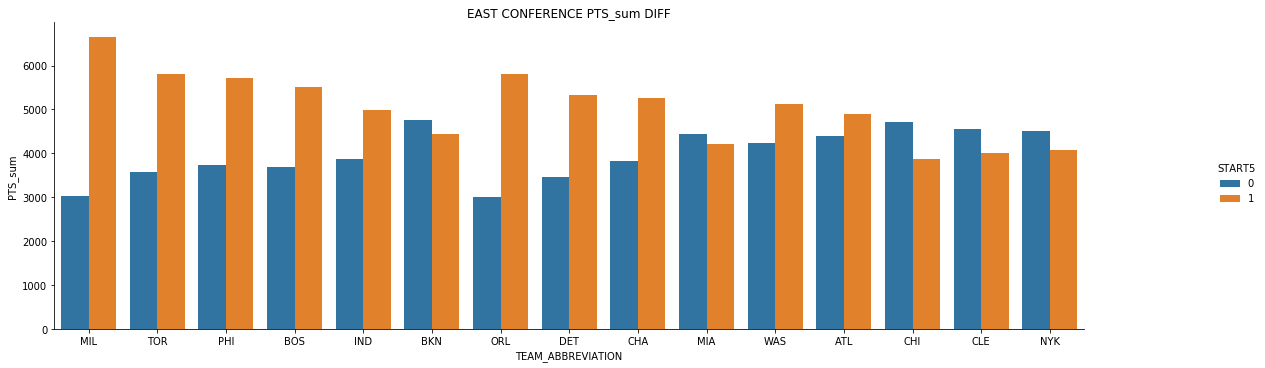

In [43]:
g = sns.catplot(x='TEAM_ABBREVIATION', y='PTS_sum', hue='START5', data=EAST, kind='bar').set(title='EAST CONFERENCE PTS_sum DIFF')
g.fig.set_figwidth(20); g.fig.set_figheight(5)

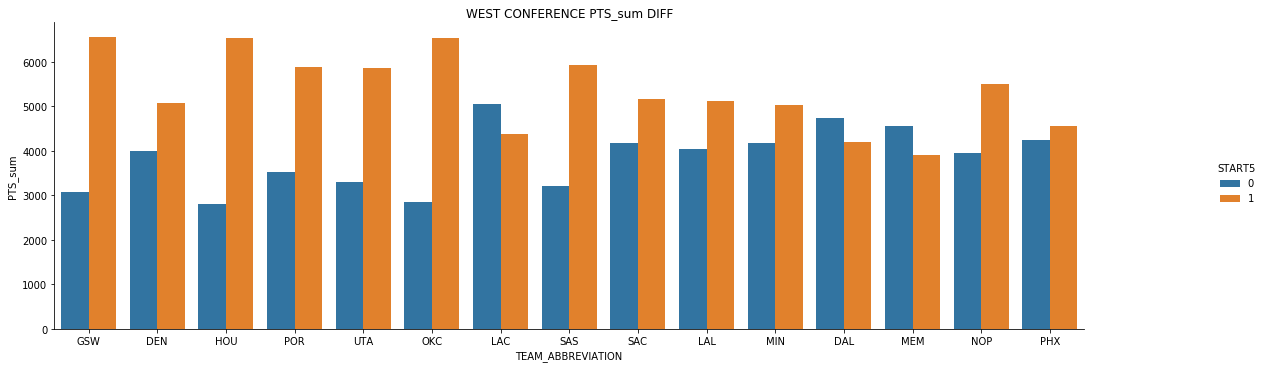

In [44]:
g = sns.catplot(x='TEAM_ABBREVIATION', y='PTS_sum', hue='START5', data=WEST, kind='bar').set(title='WEST CONFERENCE PTS_sum DIFF')
g.fig.set_figwidth(20); g.fig.set_figheight(5)

As you can see, Top teams have higher points difference by START5 than BENCH.  
This means that having strong starting member is the key to get higher rank in Basketball, especially in NBA(2018-19).  

## Let's see 'PLUS_MINUS_sum' of START VS. BENCH

In [45]:
# you can the diff of PTS between Starting and Bench
tmp.groupby(['TEAM_ABBREVIATION','START5'])['PLUS_MINUS_sum'].sum().head()

TEAM_ABBREVIATION  START5
ATL                0        -1524.0
                   1         -946.0
BKN                0          112.0
                   1         -142.0
BOS                0          633.0
Name: PLUS_MINUS_sum, dtype: float64

In [46]:
tmp1 = tmp.groupby(['TEAM_ABBREVIATION','START5'])['PLUS_MINUS_sum'].sum().reset_index()
tmp1 = tmp1.merge(tmp[['TEAM_ABBREVIATION','Conf_rank']].groupby(['TEAM_ABBREVIATION'])['Conf_rank'].max(), on=['TEAM_ABBREVIATION'], how='left')

In [47]:
EAST = tmp1[tmp1['Conf_rank'].str.contains("East")][:]
EAST['Conf_rank'] = EAST['Conf_rank'].apply(lambda x: get_rank(x))
WEST = tmp1[tmp1['Conf_rank'].str.contains("West")][:]
WEST['Conf_rank'] = WEST['Conf_rank'].apply(lambda x: get_rank(x))

In [48]:
EAST = EAST.sort_values(['Conf_rank','TEAM_ABBREVIATION'])
WEST = WEST.sort_values(['Conf_rank','TEAM_ABBREVIATION'])

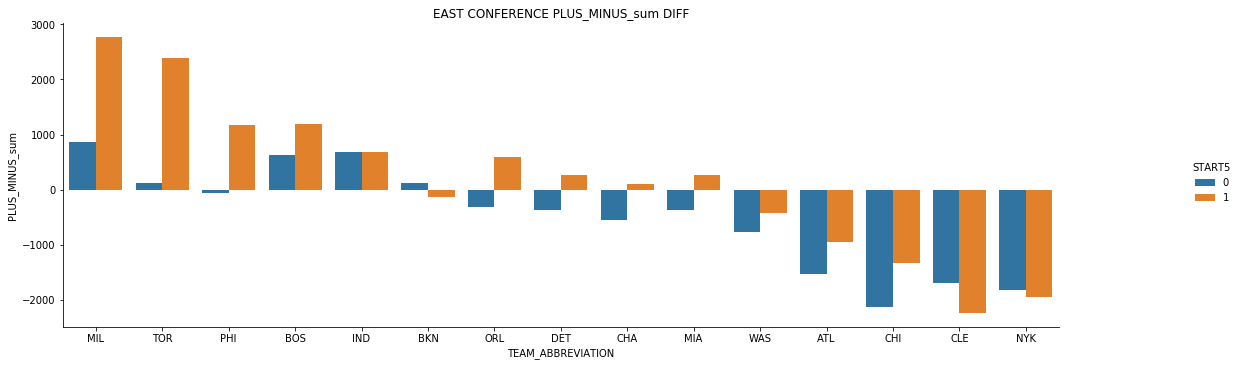

In [49]:
g = sns.catplot(x='TEAM_ABBREVIATION', y='PLUS_MINUS_sum', hue='START5', data=EAST, kind='bar').set(title='EAST CONFERENCE PLUS_MINUS_sum DIFF')
g.fig.set_figwidth(20); g.fig.set_figheight(5)

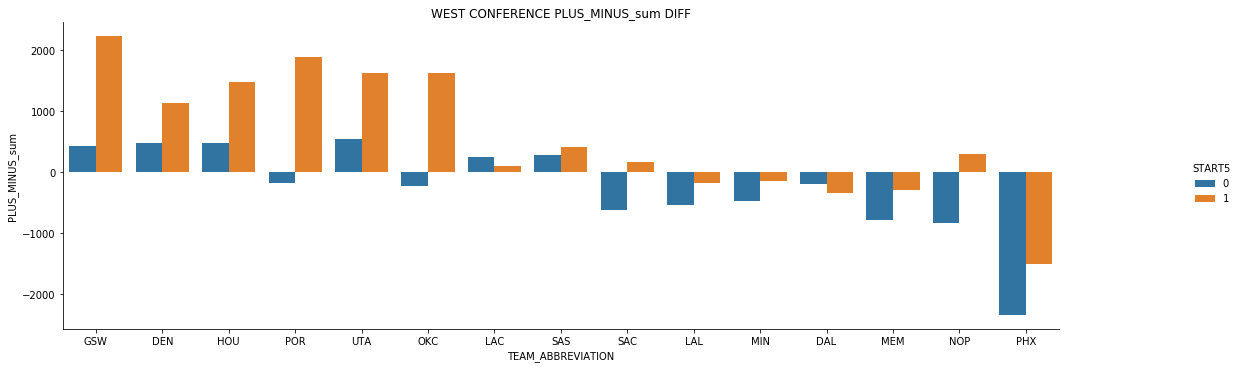

In [50]:
g = sns.catplot(x='TEAM_ABBREVIATION', y='PLUS_MINUS_sum', hue='START5', data=WEST, kind='bar').set(title='WEST CONFERENCE PLUS_MINUS_sum DIFF')
g.fig.set_figwidth(20); g.fig.set_figheight(5)

**Voila !**  
This plot tells more about START vs. BENCH.  
Most of Top teams are having positive numbers meaning that their 'bench' players do some contributions for their own team.  

## PLUS_MINUS_mean

In [51]:
# you can the diff of PTS between Starting and Bench
tmp.groupby(['TEAM_ABBREVIATION','START5'])['PLUS_MINUS_mean'].sum().head()

TEAM_ABBREVIATION  START5
ATL                0        -46.797964
                   1        -14.089678
BKN                0         20.947535
                   1         -1.680737
BOS                0         43.805565
Name: PLUS_MINUS_mean, dtype: float64

In [52]:
tmp1 = tmp.groupby(['TEAM_ABBREVIATION','START5'])['PLUS_MINUS_mean'].sum().reset_index()
tmp1 = tmp1.merge(tmp[['TEAM_ABBREVIATION','Conf_rank']].groupby(['TEAM_ABBREVIATION'])['Conf_rank'].max(), on=['TEAM_ABBREVIATION'], how='left')

In [53]:
EAST = tmp1[tmp1['Conf_rank'].str.contains("East")][:]
EAST['Conf_rank'] = EAST['Conf_rank'].apply(lambda x: get_rank(x))
WEST = tmp1[tmp1['Conf_rank'].str.contains("West")][:]
WEST['Conf_rank'] = WEST['Conf_rank'].apply(lambda x: get_rank(x))

In [54]:
EAST = EAST.sort_values(['Conf_rank','TEAM_ABBREVIATION'])
WEST = WEST.sort_values(['Conf_rank','TEAM_ABBREVIATION'])

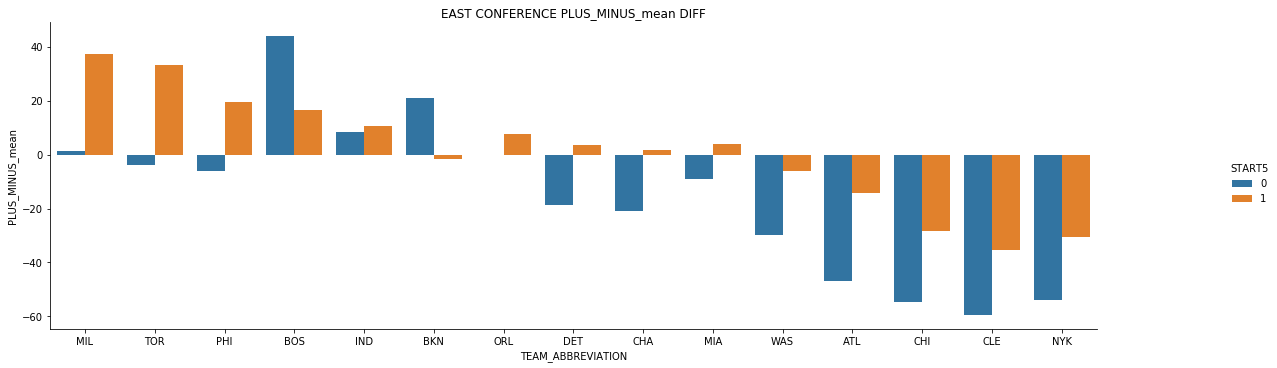

In [55]:
g = sns.catplot(x='TEAM_ABBREVIATION', y='PLUS_MINUS_mean', hue='START5', data=EAST, kind='bar').set(title='EAST CONFERENCE PLUS_MINUS_mean DIFF')
g.fig.set_figwidth(20); g.fig.set_figheight(5)

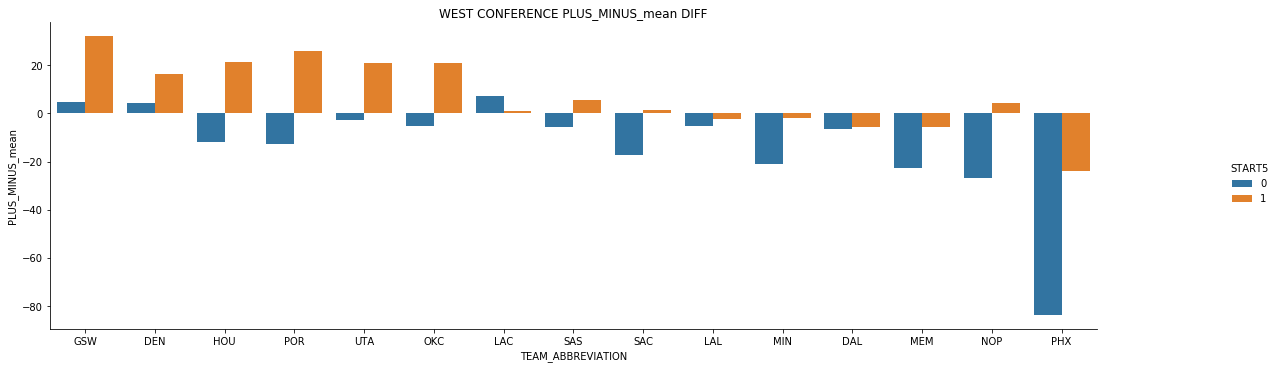

In [56]:
g = sns.catplot(x='TEAM_ABBREVIATION', y='PLUS_MINUS_mean', hue='START5', data=WEST, kind='bar').set(title='WEST CONFERENCE PLUS_MINUS_mean DIFF')
g.fig.set_figwidth(20); g.fig.set_figheight(5)

**PLUS_MINUS_mean**  
PLUS_MINUS_mean plot shows that sum can't give us.  
There is much possibility of **garbage game** for top teams. This gives many playtimes for bench members both the top teams and the teams against this teams.  
Thus, the teams, whose bench players' gain is higher than starting players like BOS, and BKN, are having **good bench players**.  

## **The reason for selecting PLUS_MINUS_sum and PLUS_MINUS_mean is below:**

### **Corr Heatmap Plot with naive dataset**

In [57]:
def correlation_heatmap(df,size=(30,30)):
    _ , ax = plt.subplots(figsize = size)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':9 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [58]:
tmp['Conf_rank'].head()

0    12_East
1    12_East
2    12_East
3    12_East
4    12_East
Name: Conf_rank, dtype: object

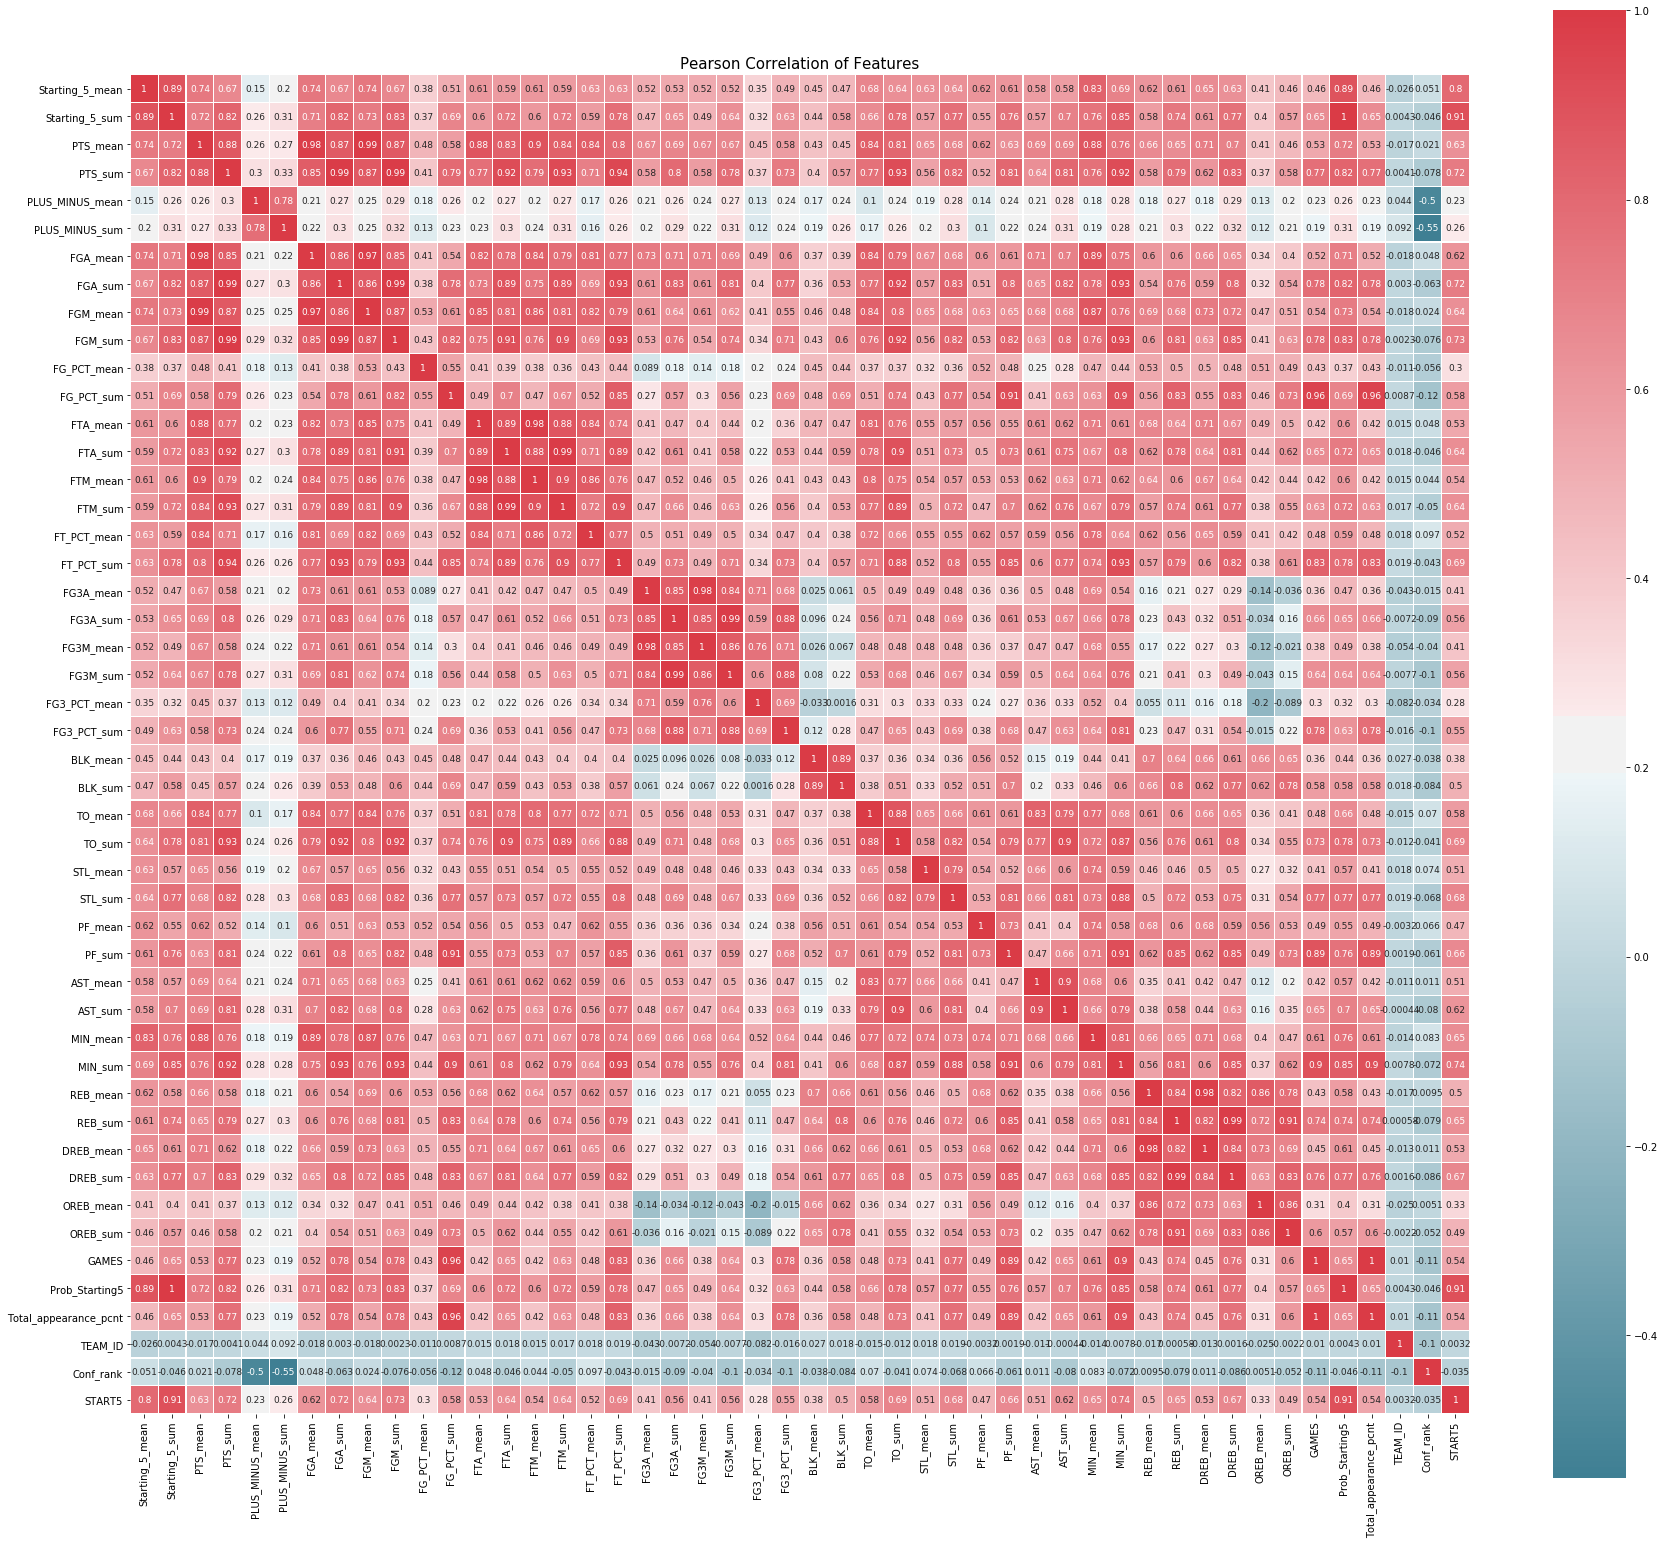

In [59]:
corr_df = tmp.drop(['G','W','L','W_PCT'],axis=1)
corr_df['Conf_rank'] = corr_df['Conf_rank'].apply(lambda x: get_rank(x))
correlation_heatmap(corr_df,size=(30,30))

Look at the very bottom row that shows pearson corr with 'Conf_rank'.  
The very bottom row shows that only 'PLUS_MINUS_mean' and 'PLUS_MINUS_sum' are standout.  
> PLUS_MINUS: the point difference as the player in the floor.

This column show sort of contribution of the player to the team in the game.  
I assume, i can say it's degree of contribution of the player.  

You shouldn't blindly believe this result since the data is grouped by teams and players.  

Zoom

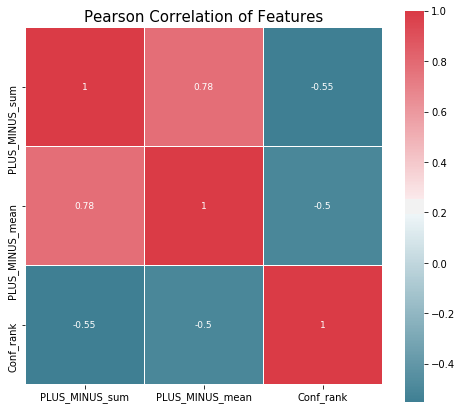

In [60]:
correlation_heatmap(corr_df[['PLUS_MINUS_sum','PLUS_MINUS_mean','Conf_rank']],size=(8,8))

# Summary
## - Starting 5 players are **(really)*inf** important to win
## - But Good Bench players can make the team to get the higher rank in the season.

BOSTON's Good Bench players are:

In [66]:
tmp[(tmp['TEAM_ABBREVIATION']=="BOS")&(tmp['START5']==0)&(tmp['PLUS_MINUS_mean']>0)].sort_values(['PTS_mean'],ascending=False)

,TEAM_ABBREVIATION,PLAYER_NAME,Starting_5_mean,Starting_5_sum,PTS_mean,PTS_sum,PLUS_MINUS_mean,PLUS_MINUS_sum,FGA_mean,FGA_sum,FGM_mean,FGM_sum,FG_PCT_mean,FG_PCT_sum,FTA_mean,FTA_sum,FTM_mean,FTM_sum,FT_PCT_mean,FT_PCT_sum,FG3A_mean,FG3A_sum,FG3M_mean,FG3M_sum,FG3_PCT_mean,...,STL_sum,PF_mean,PF_sum,AST_mean,AST_sum,MIN_mean,MIN_sum,REB_mean,REB_sum,DREB_mean,DREB_sum,OREB_mean,OREB_sum,GAMES,Prob_Starting5,Total_appearance_pcnt,TEAM_ID,CONFERENCE,TEAM,G,W,L,W_PCT,Conf_rank,START5
54,BOS,RJ Hunter,0.000000,0,17.000000,17.0,28.000000,28.0,13.000000,13.0,6.000000,6.0,0.462000,0.462,2.000000,2.0,1.000000,1.0,0.500000,0.500,10.000000,10.0,4.000000,4.0,0.400000,...,1.0,3.000000,3.0,3.000000,3.0,1541.000000,1541,3.000000,3.0,2.000000,2.0,1.000000,1.0,1,0.000000,0.012195,1610612738,East,Boston,82,49,33,0.598,4_East,0
48,BOS,Jaylen Brown,0.337838,25,13.027027,964.0,0.891892,66.0,10.702703,792.0,4.972973,368.0,0.466014,34.485,2.729730,202.0,1.797297,133.0,0.488662,36.161,3.729730,276.0,1.283784,95.0,0.313649,...,69.0,2.513514,186.0,1.351351,100.0,1551.351351,114800,4.229730,313.0,3.351351,248.0,0.878378,65.0,74,0.304878,0.902439,1610612738,East,Boston,82,49,33,0.598,4_East,0
45,BOS,Gordon Hayward,0.250000,18,11.458333,825.0,2.958333,213.0,8.819444,635.0,4.111111,296.0,0.428403,30.845,2.597222,187.0,2.166667,156.0,0.609806,43.906,3.208333,231.0,1.069444,77.0,0.280250,...,62.0,1.444444,104.0,3.388889,244.0,1552.791667,111801,4.472222,322.0,3.763889,271.0,0.708333,51.0,72,0.219512,0.878049,1610612738,East,Boston,82,49,33,0.598,4_East,0
44,BOS,Daniel Theis,0.030303,2,5.666667,374.0,1.984848,131.0,4.030303,266.0,2.212121,146.0,0.463909,30.618,1.151515,76.0,0.848485,56.0,0.323045,21.321,1.015152,67.0,0.393939,26.0,0.212121,...,21.0,2.439394,161.0,1.030303,68.0,825.075758,54455,3.409091,225.0,2.090909,138.0,1.318182,87.0,66,0.024390,0.804878,1610612738,East,Boston,82,49,33,0.598,4_East,0
42,BOS,Aron Baynes,0.352941,18,5.568627,284.0,2.549020,130.0,4.372549,223.0,2.058824,105.0,0.464078,23.668,1.215686,62.0,1.039216,53.0,0.406863,20.750,1.196078,61.0,0.411765,21.0,0.248373,...,12.0,2.450980,125.0,1.117647,57.0,965.686275,49250,4.705882,240.0,2.980392,152.0,1.725490,88.0,51,0.219512,0.621951,1610612738,East,Boston,82,49,33,0.598,4_East,0
43,BOS,Brad Wanamaker,0.000000,0,3.888889,140.0,2.000000,72.0,2.916667,105.0,1.388889,50.0,0.453472,16.325,0.777778,28.0,0.666667,24.0,0.290667,10.464,1.083333,39.0,0.444444,16.0,0.268861,...,12.0,0.944444,34.0,1.555556,56.0,571.027778,20557,1.138889,41.0,1.055556,38.0,0.083333,3.0,36,0.000000,0.439024,1610612738,East,Boston,82,49,33,0.598,4_East,0
56,BOS,Semi Ojeleye,0.053571,3,3.321429,186.0,1.250000,70.0,2.821429,158.0,1.196429,67.0,0.344161,19.273,0.696429,39.0,0.428571,24.0,0.205357,11.500,1.589286,89.0,0.500000,28.0,0.216571,...,10.0,0.767857,43.0,0.410714,23.0,636.946429,35669,1.535714,86.0,1.107143,62.0,0.428571,24.0,56,0.036585,0.682927,1610612738,East,Boston,82,49,33,0.598,4_East,0
53,BOS,PJ Dozier,0.000000,0,3.166667,19.0,4.166667,25.0,3.500000,21.0,1.333333,8.0,0.159500,0.957,0.333333,2.0,0.166667,1.0,0.083333,0.500,1.333333,8.0,0.333333,2.0,0.194500,...,2.0,0.333333,2.0,0.833333,5.0,508.500000,3051,2.833333,17.0,1.833333,11.0,1.000000,6.0,6,0.000000,0.073171,1610612738,East,Boston,82,49,33,0.598,4_East,0
46,BOS,Greg Monroe,0.000000,0,3.000000,6.0,2.500000,5.0,2.500000,5.0,1.500000,3.0,0.583500,1.167,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.500000,1.0,144.500000,289,1.500000,3.0,0.000000,0.0,1.500000,3.0,2,0.000000,0.024390,1610612738,East,Boston,82,49,33,0.598,4_East,0


Can you see him?  
A outlier.  
RJ Hunter.  
He just played one game for Boston in 2018-19 season and scored 17 points.  
And that game was the last game of the season. 😱
Carried the last game and leave the team. 😱  

<img src="images/rjhunter.png" width="50%" height="50%">  
<https://www.youtube.com/watch?v=gwYx71du-iE>  

Regular Bench players:  
Jaylen Brown and Gordon Hayward are having two digits in points.  

Jaylen Brown becomes franchise player of Boston since his debut.  
 
<img src="images/jbrown.jpg"  width="50%" height="50%">  

Gordon Hayward is one-time NBA all star player.  

<img src="images/Gordon-Hayward.jpg"  width="50%" height="50%"> 